# Importing all The Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report

# Reading Csv File From a Local Disk

In [2]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets 1\\sms_spam.csv")

In [3]:
x.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


# Cleaning The Data

In [4]:
import re
def remove(y) :
    y=re.sub("[^0-9a-zA-Z]"," ",y)
    y=re.sub("[0-9]"," ",y)
    y=y.lower()
    return y

In [5]:
x["Clean"]=x.text.apply(remove)

In [6]:
x.drop(["text"],axis=1,inplace=True)

In [7]:
x.head()

,type,Clean
0,ham,hope you are having a good week just checking in
1,ham,k give back my thanks
2,ham,am also doing in cbe only but have to pay
3,spam,complimentary star ibiza holiday or ...
4,spam,okmail dear dave this is your final notice to...


# Building The Model

In [8]:
t=TfidfVectorizer(min_df=3,max_df=5,use_idf=True)

In [9]:
t1=t.fit_transform(x["Clean"])

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
m=MultinomialNB()

In [12]:
b=x["type"]

In [13]:
n=m.fit(t1,b)

In [14]:
n

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Predecting The Model

In [15]:
pred=n.predict(t1)

# Evulating The Model

In [16]:
print(confusion_matrix(b,pred))

[[4812    0]
 [ 436  311]]


In [17]:
print(classification_report(b,pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      4812
        spam       1.00      0.42      0.59       747

    accuracy                           0.92      5559
   macro avg       0.96      0.71      0.77      5559
weighted avg       0.93      0.92      0.91      5559



# Vizuvalising The Words Using Word Cloud

In [18]:
from wordcloud import WordCloud,STOPWORDS

In [19]:
y=x["Clean"].values

In [21]:
w=WordCloud(width=3000,height=2000,collocations=False,random_state=123,colormap="prism",stopwords=STOPWORDS).generate(str(y))

In [22]:
import matplotlib.pyplot as plt

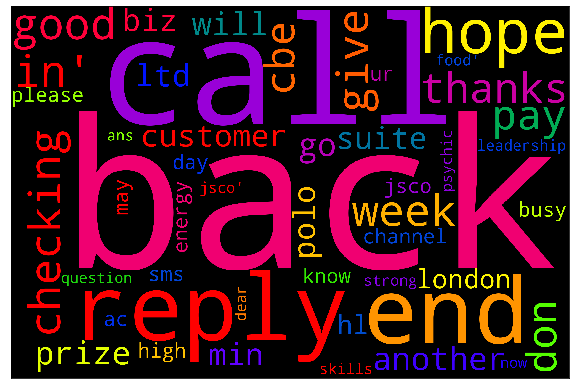

In [24]:
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(w)